In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/Social_Network_Ads.xlsx")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User ID           400 non-null    int64 
 1   Gender            400 non-null    object
 2   Age               400 non-null    int64 
 3   EstimatedSalary   400 non-null    int64 
 4   Purchased         400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [ ]:
print("No.of duplicate records is ",df.duplicated().sum())

No.of duplicate records is  0


In [ ]:
import seaborn as sns 

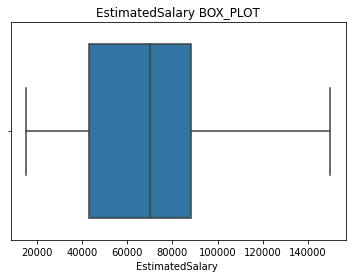

In [ ]:
sns.boxplot(x = df['EstimatedSalary '])
plt.title("EstimatedSalary BOX_PLOT")
plt.show()

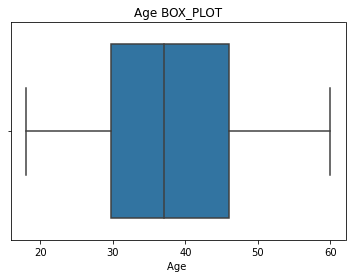

In [ ]:
sns.boxplot(x = df['Age '])
plt.title("Age BOX_PLOT")
plt.show()

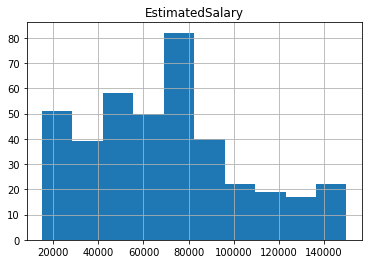

In [ ]:
df['EstimatedSalary '].hist()
plt.title('EstimatedSalary')
plt.show()

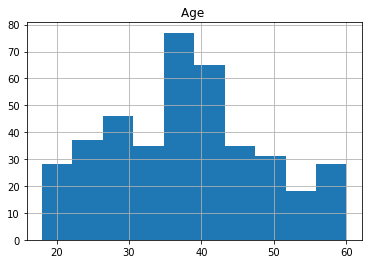

In [ ]:
df['Age '].hist()
plt.title('Age ')
plt.show()

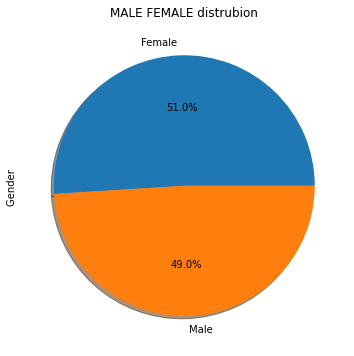

In [ ]:
df['Gender '].value_counts().plot.pie(autopct = '%1.1f%%', shadow= True, figsize = (6, 6)) 
plt.title("MALE FEMALE distrubion")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


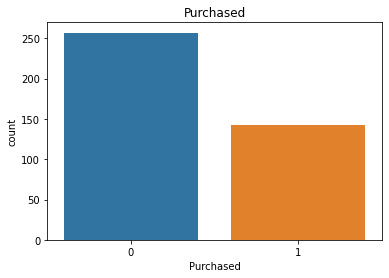

In [ ]:
sns.countplot('Purchased',data = df )
plt.title("Purchased")
plt.show()

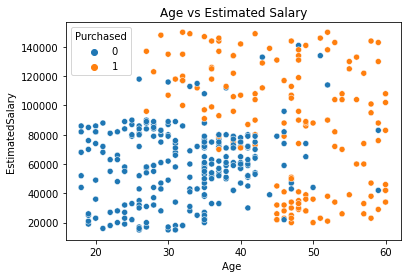

In [ ]:
sns.scatterplot(data = df,x = 'Age ',y = 'EstimatedSalary ',hue = 'Purchased')
plt.title("Age vs Estimated Salary")
plt.show()

In [ ]:
df['Gender '].unique()

array(['Male ', 'Female '], dtype=object)

In [ ]:
for i in range(len(df['Gender '])):
  if df.iloc[i,1] == 'Male ':
    df.iloc[i,1] = 0
  else:
    df.iloc[i,1] = 1

In [ ]:
df = df.drop('User ID ', axis=1)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


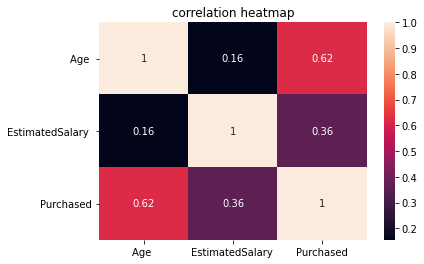

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.title("correlation heatmap")
plt.show()

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [ ]:
import collections 
from math import sqrt
from math import exp

In [ ]:
def pre_prob(y):
    y_dict = collections.Counter(y)
    pre_probab = np.ones(2)
    for i in range(0, 2):
        pre_probab[i] = y_dict[i]/y.shape[0]
    return pre_probab

In [ ]:
def mean_var(X, y):
    n_features = X.shape[1]
    m = np.ones((2, n_features))
    v = np.ones((2, n_features))
    n_0 = np.bincount(y)[np.nonzero(np.bincount(y))[0]][0]
    x0 = np.ones((n_0, n_features))
    x1 = np.ones((X.shape[0] - n_0, n_features))
    
    k = 0
    for i in range(0, X.shape[0]):
        if y[i] == 0:
            x0[k] = X[i]
            k = k + 1
    k = 0
    for i in range(0, X.shape[0]):
        if y[i] == 1:
            x1[k] = X[i]
            k = k + 1
        
    for j in range(0, n_features):
        m[0][j] = np.mean(x0.T[j])
        v[0][j] = np.var(x0.T[j])*(n_0/(n_0 - 1))
        m[1][j] = np.mean(x1.T[j])
        v[1][j] = np.var(x1.T[j])*((X.shape[0]-n_0)/((X.shape[0]
                                                      - n_0) - 1))
    return m, v

In [ ]:
def prob_feature_class(m, v, x):
    n_features = m.shape[1]
    pfc = np.ones(2)
    for i in range(0, 2):
        product = 1
        for j in range(0, n_features):
            product = product * (1/sqrt(2*3.14*v[i][j])) * exp(-0.5
                                 * pow((x[j] - m[i][j]),2)/v[i][j])
        pfc[i] = product
    return pfc

In [ ]:
def GNB(X, y, x):
    m, v = mean_var(X, y)
    pfc = prob_feature_class(m, v, x)
    pre_probab = pre_prob(y)
    pcf = np.ones(2)
    total_prob = 0
    for i in range(0, 2):
        total_prob = total_prob + (pfc[i] * pre_probab[i])
    for i in range(0, 2):
        pcf[i] = (pfc[i] * pre_probab[i])/total_prob
    prediction = int(pcf.argmax())
    return  prediction

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
y_pre = list()

In [ ]:
for x in X_test:
  prediction = GNB(X_train, y_train, x)
  y_pre.append(prediction)


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pre)

array([[85,  4],
       [ 5, 38]])

In [ ]:
print("accuracy : ",(85+38)/(85+4+5+38))

accuracy :  0.9318181818181818


In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop= X_set[:,0].max()+1, step = 0.01),np.arange(start = X_set[:,1].min()-1, stop= X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(("red","green")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1], c = ListedColormap(("red","green"))(i),label = j)
plt.title("Decision Tree(Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

NameError: ignored